# Introduction


A deep policy network to beat cartpole

-----------------------------------------------------------------------------
Notes:

http://rail.eecs.berkeley.edu/deeprlcourse-fa17/f17docs/lecture_4_policy_gradient.pdf

chrome-extension://klbibkeccnjlkjkiokjodocebajanakg/suspended.html#ttl=An%20introduction%20to%20Policy%20Gradients%20with%20Cartpole%20and%20Doom&uri=https://medium.freecodecamp.org/an-introduction-to-policy-gradients-with-cartpole-and-doom-495b5ef2207f


Code from here

https://gist.github.com/kkweon/c8d1caabaf7b43317bc8825c226045d2

### Main

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from agent import PolicyAgent    #defined my agent here
%matplotlib inline


EPISODES = 5000

env = gym.make('CartPole-v0')
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
agent = PolicyAgent(num_states, num_actions)
agent.gamma = 0.999
# agent.load("./save/cartpole-dqn.h5")
done = False

scores = []

for e in range(EPISODES):
    state = env.reset()
    state = np.reshape(state, [1, num_states])
    reward_sum = 0
    for time in range(500):
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        reward_sum += reward
        next_state = np.reshape(next_state, [1, num_states])
        agent.remember(state[0], action, reward)
        state = next_state
        if done:
            break
    
    #Learn & print results
    agent.learn()
    scores.append(reward_sum)
    if e % 50 == 0:
        print('(episode, score) = ' + str((e,reward_sum)))
        
plt.plot(scores)
np.savetxt('stats/scores_cartpole.txt',scores)

SyntaxError: invalid syntax (<ipython-input-1-cf926dfb52f9>, line 40)

So pretty unstable. This is expected, since its just vanilla policy gradient stuff.

### Roughwork

From https://github.com/keon/policy-gradient/blob/master/pg.py

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Use tf.cast instead.
(episode, score) = (0, 20.0)


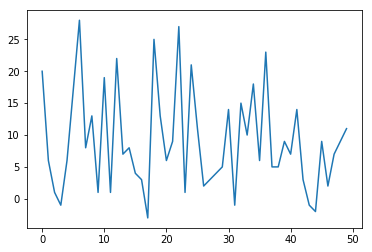

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from agent import PolicyAgent    #defined my agent here
%matplotlib inline


EPISODES = 50

env = gym.make('CartPole-v0')
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
agent = PolicyAgent(num_states, num_actions)
agent.gamma = 0.999
# agent.load("./save/cartpole-dqn.h5")
done = False

scores = []

for e in range(EPISODES):
    state = env.reset()
    state = np.reshape(state, [1, num_states])
    reward_sum = 0
    for time in range(500):
        # env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        reward_sum += reward
        next_state = np.reshape(next_state, [1, num_states])
        agent.remember(state[0], action, reward)
        state = next_state
        if done:
            break
    
    #Learn & print results
    #agent.learn()
    scores.append(reward_sum)
    if e % 50 == 0:
        print('(episode, score) = ' + str((e,reward_sum)))
        
plt.plot(scores)
np.savetxt('stats/scores_cartpole.txt',scores)